In [11]:
from classes import *
import matplotlib.pyplot as plt
import networkx as nx
import random
import utils as u

#seed = 196796533
#random.seed(seed)

# PARAMS
k = 6
layers = 2

f_mean = 5  #around what do you want your costs to distribute
f_std = 1

# SETUP
N = Network(k,layers,f_mean,f_std)

start_node = 1
end_node = layers * (k - 1) + 1

for i in range(start_node, end_node + 1):
    N.add_node(i)

N.create_layers()

I = Interdictor(N)


[1, 4, 6, 10, 11]
[3.2817395345310936, 0.5449833273082672, 1.2202497844730058, 1.4282800723511921]
6.475252718663558


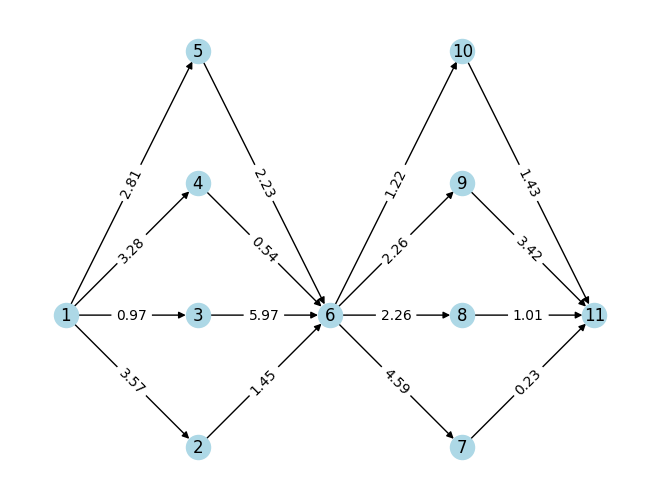

In [12]:
N.show()
path, evader_cost, total_cost = N.calculate_evader_cost()
print(path)
print(evader_cost)
print(total_cost)


[1, 4, 6, 10, 11]
[3.2817395345310936, 0.5449833273082672, 1.2202497844730058, 1.4282800723511921]
6.475252718663558


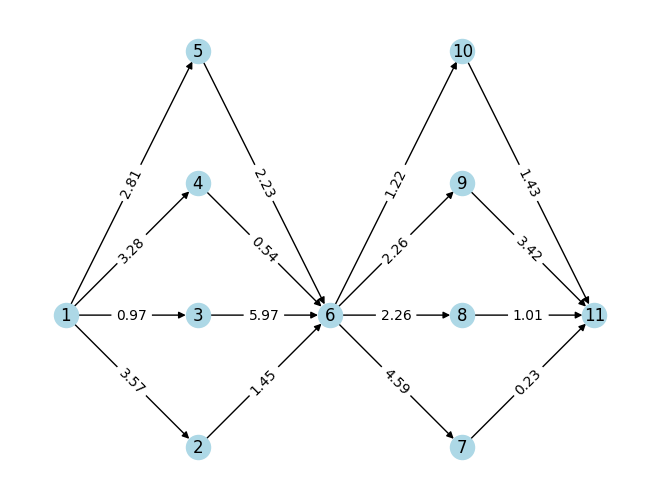

In [13]:
I.interdict()
N.show()
path, evader_cost, total_cost = N.calculate_evader_cost()
I.update_filtration()
print(path)
print(evader_cost)
print(total_cost)
N.reset_costs()


In [14]:
I.filtration


{(1, 2): [],
 (2, 6): [],
 (1, 3): [],
 (3, 6): [],
 (1, 4): [3.2817395345310936],
 (4, 6): [0.5449833273082672],
 (1, 5): [],
 (5, 6): [],
 (6, 7): [],
 (7, 11): [],
 (6, 8): [],
 (8, 11): [],
 (6, 9): [],
 (9, 11): [],
 (6, 10): [1.2202497844730058],
 (10, 11): [1.4282800723511921]}

In [15]:
for edge,obj in I.ts.items():
    print(edge,obj.post_mu_of_mu,obj.post_sigma_of_mu)


(1, 2) 0 1000
(2, 6) 0 1000
(1, 3) 0 1000
(3, 6) 0 1000
(1, 4) 3.2817362527948415 0.9999995000003751
(4, 6) 0.5449827823254849 0.9999995000003751
(1, 5) 0 1000
(5, 6) 0 1000
(6, 7) 0 1000
(7, 11) 0 1000
(6, 8) 0 1000
(8, 11) 0 1000
(6, 9) 0 1000
(9, 11) 0 1000
(6, 10) 1.2202485642244418 0.9999995000003751
(10, 11) 1.4282786440725483 0.9999995000003751


In [16]:
for edge,obj in I.ts.items():
     print(edge,obj.mu,obj.sigma)


(1, 2) 4 1
(2, 6) 2 1
(1, 3) 2 1
(3, 6) 5 1
(1, 4) 3 1
(4, 6) 2 1
(1, 5) 3 1
(5, 6) 2 1
(6, 7) 5 1
(7, 11) 1 1
(6, 8) 2 1
(8, 11) 1 1
(6, 9) 3 1
(9, 11) 4 1
(6, 10) 3 1
(10, 11) 2 1


Simulation 1/100: Period 900/1000, Cumulative Regret = 276.34654482444023
Finished simulation for network 1, Final Cumulative Regret = 305.98273367208253
Simulation 2/100: Period 900/1000, Cumulative Regret = 255.18050610742216
Finished simulation for network 2, Final Cumulative Regret = 284.4387309117548
Simulation 3/100: Period 900/1000, Cumulative Regret = 290.80998695946483
Finished simulation for network 3, Final Cumulative Regret = 316.13386547370914
Simulation 4/100: Period 900/1000, Cumulative Regret = 277.21033189496336
Finished simulation for network 4, Final Cumulative Regret = 310.24925735853617
Simulation 5/100: Period 900/1000, Cumulative Regret = 272.35334113336729
Finished simulation for network 5, Final Cumulative Regret = 301.92531450047784
Simulation 6/100: Period 900/1000, Cumulative Regret = 267.27291072307264
Finished simulation for network 6, Final Cumulative Regret = 300.42856093112346
Simulation 7/100: Period 900/1000, Cumulative Regret = 267.70816777332182
Fin

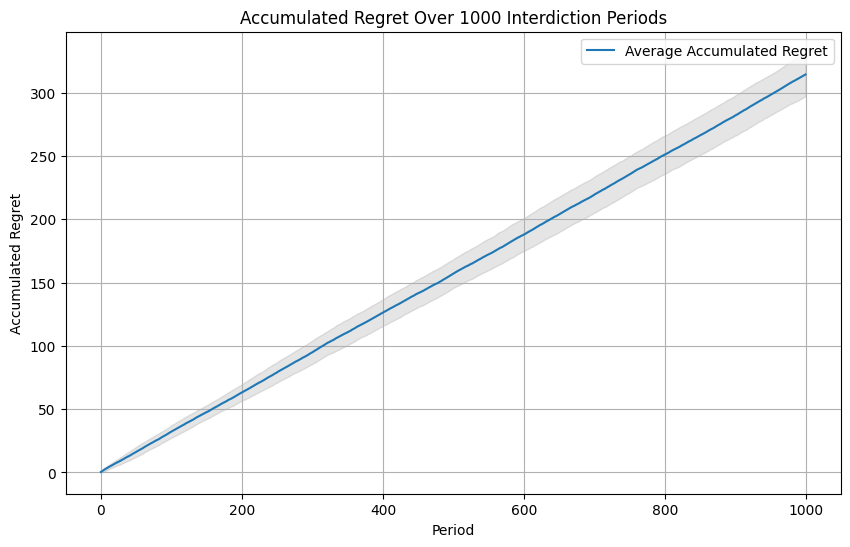

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import sys
from classes import Network, Interdictor  # Assuming your classes are in classes.py

# Initial setup for the experiments
num_networks = 100
num_periods = 1000
interdiction_budget = 1
nodes_per_layer = 10
layers = 1  # Number of layers in the network

# Store the regret results for each simulation
all_regrets = []

for network_id in range(num_networks):
    # Create a network with the desired parameters
    network = Network(nodes_per_layer=nodes_per_layer, layers=layers, f_mean=1, f_std=1, interdiction_budget=interdiction_budget)
    start_node = 1
    end_node = layers * (nodes_per_layer - 1) + 1

    # Add nodes and create layers in the network
    for i in range(start_node, end_node + 1):
        network.add_node(i)
    network.create_layers()

    interdictor = Interdictor(network)
    cumulative_regret = 0
    regrets = []

    # Print initial status
    sys.stdout.write(f"\rSimulation {network_id + 1}/{num_networks}: Period 0/{num_periods}")
    sys.stdout.flush()

    for period in range(num_periods):
        interdictor.interdict()
        path, evader_cost, total_cost = network.calculate_evader_cost()
        interdictor.update_filtration()

        # Calculate and accumulate the regret after interdiction
        optimal_cost, optimal_interdiction = network.find_optimal_interdiction()
        regret = optimal_cost - total_cost
        cumulative_regret += regret
        regrets.append(cumulative_regret)
        network.reset_costs()

        # Update status
        if period % 100 == 0:  # Update the status every 100 periods
            sys.stdout.write(f"\rSimulation {network_id + 1}/{num_networks}: Period {period}/{num_periods}, Cumulative Regret = {cumulative_regret}")
            sys.stdout.flush()

    # Store accumulated regrets for this network
    all_regrets.append(regrets)
    print(f"\nFinished simulation for network {network_id + 1}, Final Cumulative Regret = {cumulative_regret}")

# Convert the results into a NumPy array for easier mean calculation
all_regrets = np.array(all_regrets)

# Calculate the average regret across all simulations
mean_regrets = np.mean(all_regrets, axis=0)
std_dev_regrets = np.std(all_regrets, axis=0)  # Standard deviation for the shaded area

# Plot the average accumulated regret over the 1000 periods with shaded variability
plt.figure(figsize=(10, 6))
plt.plot(mean_regrets, label='Average Accumulated Regret')
plt.fill_between(range(num_periods), mean_regrets - std_dev_regrets, mean_regrets + std_dev_regrets, color='gray', alpha=0.2)
plt.xlabel('Period')
plt.ylabel('Accumulated Regret')
plt.title('Accumulated Regret Over 1000 Interdiction Periods')
plt.legend()
plt.grid(True)
plt.show()
